## Submission Deadline

- All submissions must be made before 10:00 PM on Thursday, April 18, 2024.

## Submission Guidelines

- Format: Submissions are to be made in PDF format via Avenue to Learn, either individually or as a group of up to three members.
    - GitHub Repository: Your submission must include a link to a public GitHub repository containing the assignment.
    - Team Submissions: For group submissions, Question 15 must detail each member's contributions. Note that while there are no points allocated to Question 15, failure to provide this information will result in the assignment not being graded.

## Late Submissions

- 15% will be deducted from assignments each day after the due date (rounding up).

-   Assignments won't be accepted after 48 hours after the due date.

## Assignment Standards

Please ensure your assignment adheres to the following standards for submission:

- **Title Page Requirements:** Each submission must include a title page featuring your group members' names and student numbers. Assignments lacking a title page will not be considered for grading.
- **Individual Work:** While discussing homework problems with peers and group is permitted, the final written submission must be your group work.
- **Formatting Preferences:** The use of LaTeX for document preparation is highly recommended.
- **Font and Spacing:** Submissions must utilize an eleven-point font (Times New Roman or a similar font) with 1.5 line spacing. Ensure margins of at least 1 inch on all sides.
- **Submission Content:** Do not include the assignment questions within your PDF. Instead, clearly mark each response with the corresponding question number. Screenshots are not an acceptable form of submission under any circumstances.
- **Academic Writing:** Ensure that your writing and any references used are appropriate for an undergraduate level of study.
- **Originality Checks:** Be aware that the instructor may use various tools, including those available on the internet, to verify the originality of submitted assignments.
-  Assignment policy on the use of generative AI:
    -  Students are not permitted to use generative AI in this assignment. In alignment with [McMaster academic integrity policy](https://secretariat.mcmaster.ca/app/uploads/Academic-Integrity-Policy-1-1.pdf), it "shall be an offence knowingly to ...  submit academic work for assessment that was purchased or acquired from another source".  This includes work created by generative AI tools. Also state in the policy is the following, "Contract Cheating is the act of"outsourcing of student work to third parties" (Lancaster & Clarke, 2016, p. 639)
    with or without payment." Using Generative AI tools is a form of contract cheating.  Charges of academic dishonesty will be brought forward to the Office of Academic Integrity. 

\newpage

In [403]:
import pandas as pd
from scipy.io.arff import loadarff

In [404]:
data = []
with open('/Users/itsmine/Documents/3DA3/A6/chronic_kidney_disease_full.arff', "r") as f:
    for line in f:
        line = line.replace('\n', '')
        data.append(line.split(','))


names = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
         'bgr', 'bu',  'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc',
         'rbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
         'class', 'no_name']
    
df = pd.DataFrame(data[145:], columns=names)

In [405]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices, dmatrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


git clone https://github.com/huanj164/Assignment_6.git 

## 1. Classification Problem Identification

In the medical field, the diagnosis of a disease can often depend on the patient's physical indicators. Just like in this case, whether a patient has chronic kidney disease depends on many physical indicators like bp, bu,pcc, and so on. Now we contain a large amount of data for those indicators. In this project, we will use the data we have to train some modeling algorithms based on some of the significant indicators of a patient, and then predict whether a patient has chronic kidney disease based on the variables we chose.

## 2. Variable Transformation

In [406]:
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class,no_name
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,7800,5.2,yes,yes,no,good,no,no,ckd,None
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,6000,?,no,no,no,good,no,no,ckd,None
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,7500,?,no,yes,no,poor,no,yes,ckd,None
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,6700,3.9,yes,no,no,poor,yes,yes,ckd,None
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,7300,4.6,no,no,no,good,no,no,ckd,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,6600,5.4,no,no,no,good,no,no,notckd,None
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,7200,5.9,no,no,no,good,no,no,notckd,None
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,...,6800,6.1,no,no,no,good,no,no,notckd,None
400,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


Through initial exploration, we found that there are many categorical variables in this data set, so we need to datamaterialize these variables before calculation. For example, we use 1 for "yes" and 0 for "no".

In [407]:
transform = {
    "rbc": {'normal':1, 'abnormal':0},
    "pc": {'normal':1, 'abnormal':0},
    "pcc": {'present':1, 'notpresent':0},
    "ba": {'present':1, 'notpresent':0},
    "htn": {'yes':1, 'no':0},
    "dm": {'yes':1, 'no':0},
    "cad": {'yes':1, 'no':0},
    "appet": {'good':1, 'poor':0},
    "pe": {'yes':1, 'no':0},
    "ane": {'yes':1, 'no':0},
}

In [408]:
df.replace(transform, inplace=True)
df = df.drop('no_name', axis=1)
df = df[:400] #because the last 2 rows record nothing, so we can just drop them
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,50,3,7,4,4,4,3,4
top,60,80,1.020,0,0,1,1,0,0,?,...,?,?,?,0,0,0,1,0,0,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,257,362,316,322,339,248


## 3. Dataset Overview

In [409]:
df.isna().any()

age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
class    False
dtype: bool

In [410]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,50,3,7,4,4,4,3,4
top,60,80,1.020,0,0,1,1,0,0,?,...,?,?,?,0,0,0,1,0,0,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,257,362,316,322,339,248


1. There are 400 observations in the dataset;

2. There exist missing values in all the variables besides "age" variable;

3. "htn","dm","cad","appet","pe","ane","class" are categorical variable. In the variable description, they are binary. But they are found that some elements are mis-recording;

## 4. Association Between Variables

In [411]:
df.replace('?', pd.NA, inplace=True)

In [412]:
df.shape
# there are 400 observations

(400, 25)

In [413]:
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391,388,353,354,351,248,335,396,396,356,...,330,295,270,398,398,398,399,399,399,400
unique,76,10,5,6,6,2,2,2,2,146,...,44,92,49,2,6,3,3,3,2,4
top,60,80,1.020,0,0,1,1,0,0,99,...,41,9800,5.2,0,0,0,1,0,0,ckd
freq,19,116,106,199,290,201,259,354,374,10,...,21,11,18,251,257,362,316,322,339,248


In [414]:
columns_to_convert = df.columns.difference(['class'])  # 选择除了'class'列外的所有列
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class     object
dtype: object

In [415]:
numerical = ["age",'bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']
df_numerical = df[numerical]

In [416]:
categorical = ["sg",'al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
df_categorical = df[categorical]

In [417]:
df_numerical.isnull().any()

age     True
bp      True
bgr     True
bu      True
sc      True
sod     True
pot     True
hemo    True
pcv     True
wbcc    True
rbcc    True
dtype: bool

<Axes: >

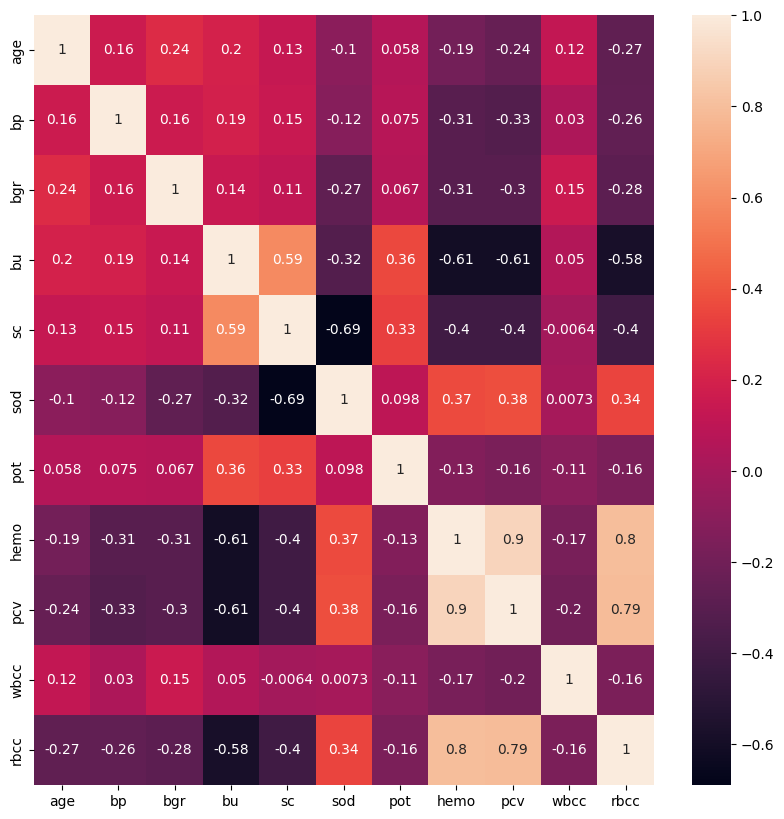

In [418]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_numerical.corr(),annot=True)

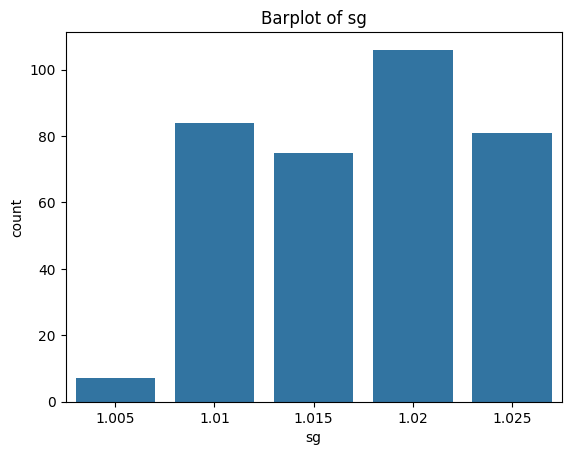

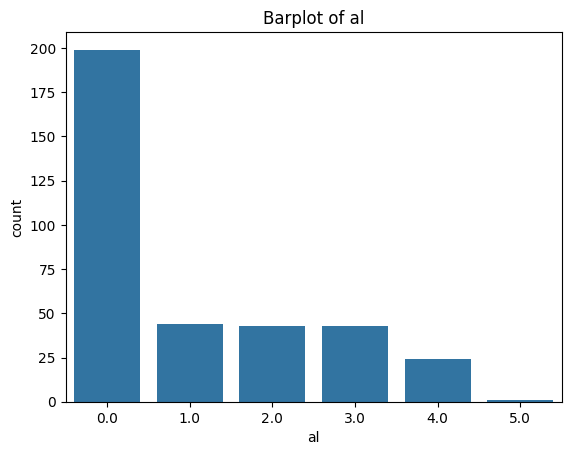

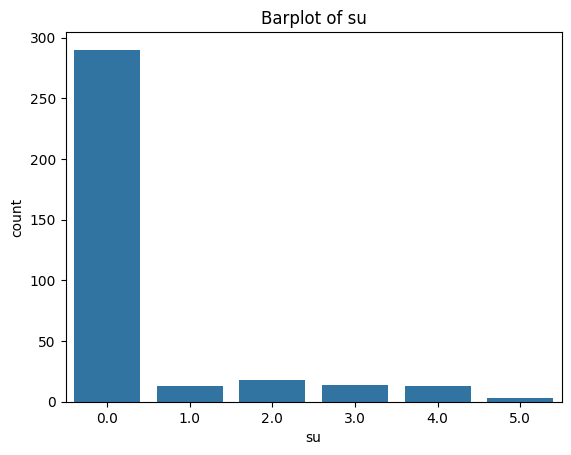

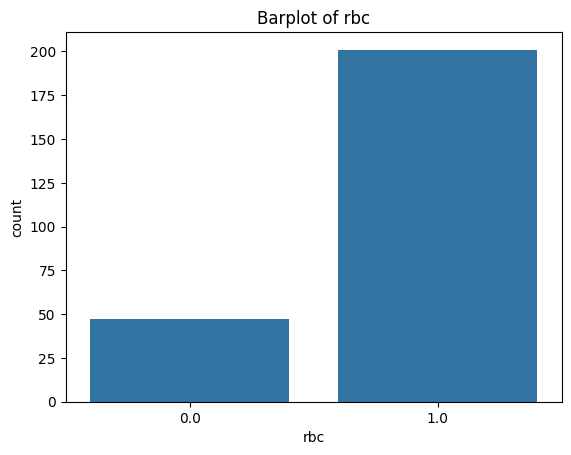

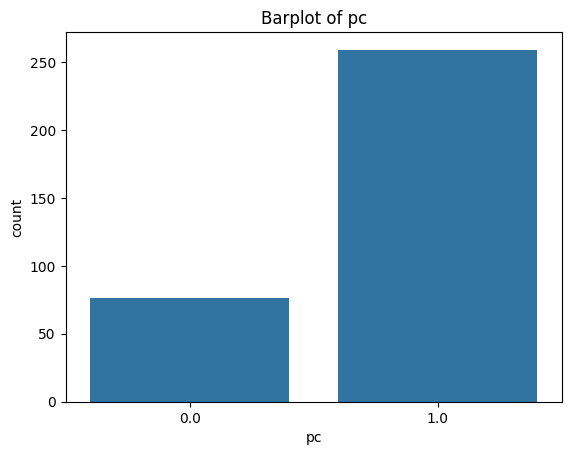

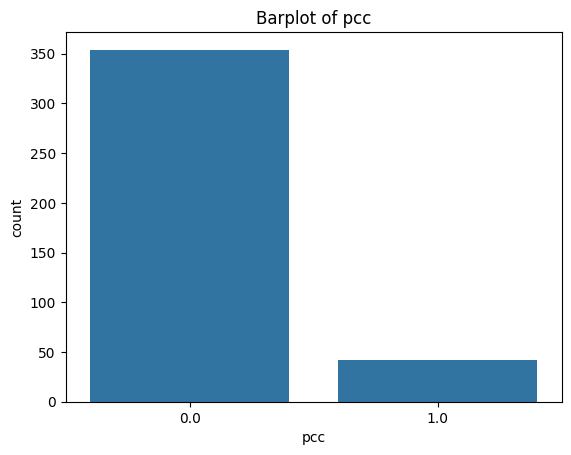

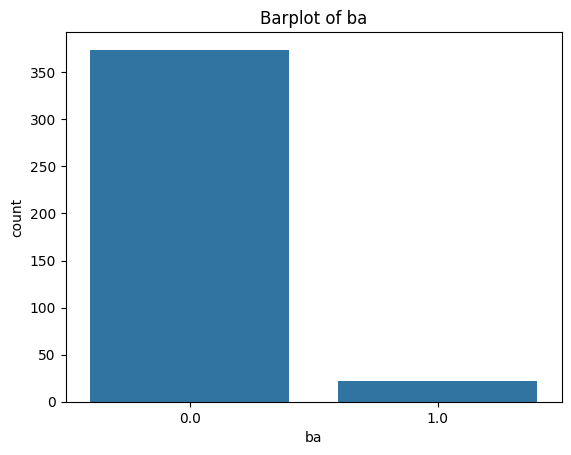

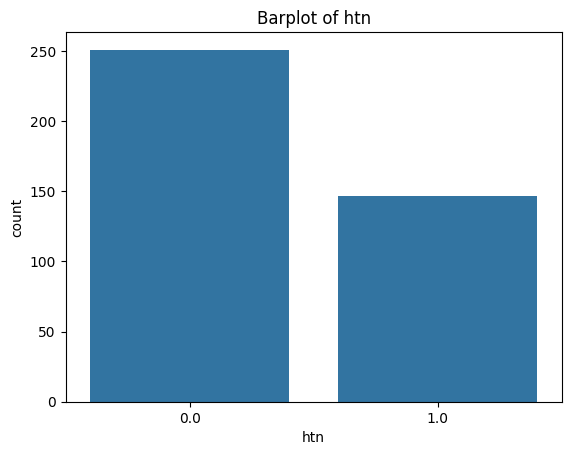

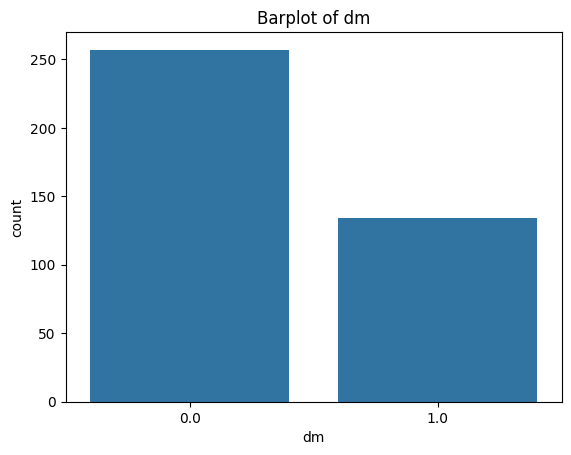

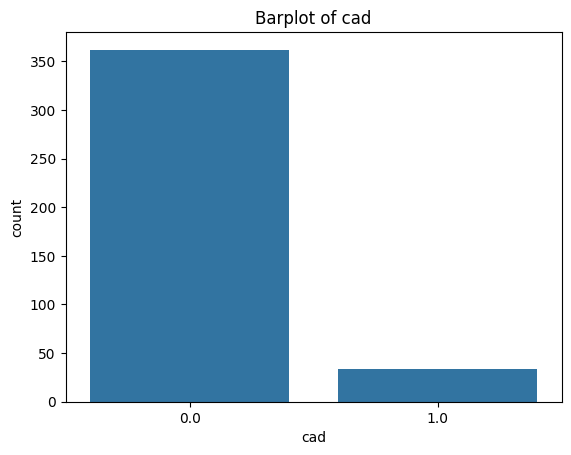

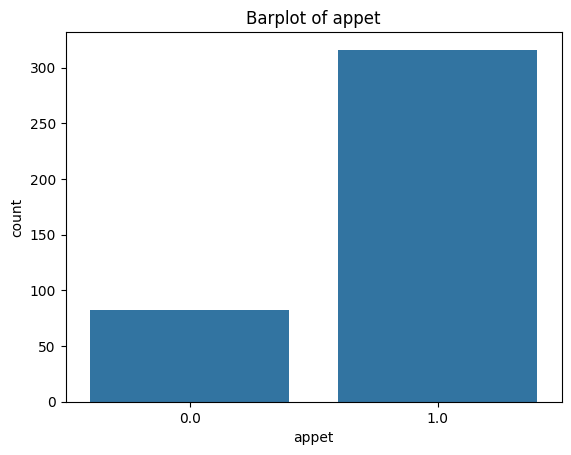

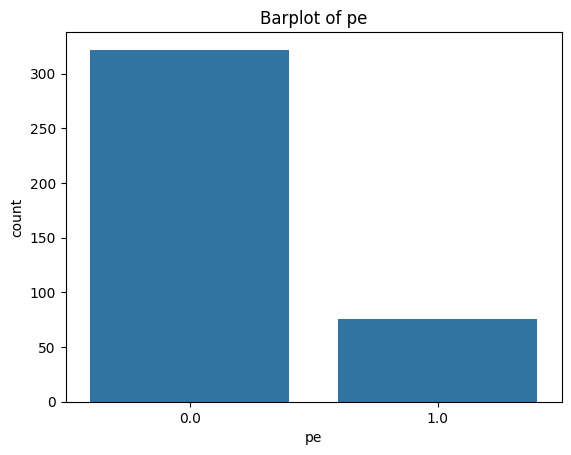

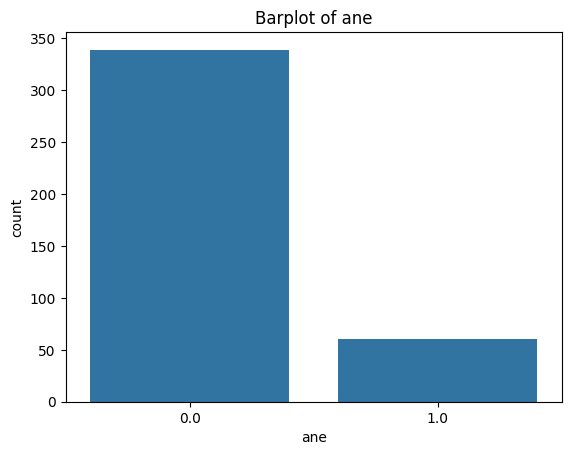

In [419]:
for column in df_categorical.columns:
    plt.figure()  # 创建一个新的图形
    sns.countplot(x=column, data=df_categorical)  # 使用countplot()绘制柱状图
    plt.title(f'Barplot of {column}')  # 设置图形标题
    plt.show()  # 显示图形

1. "rbcc" and "hemo", "pcv" have strong positive correlation;
2. "al" and "hemo", "pcv" have strong negetive correlation;
3. "pot" has compartively weak correlation to most of variables.

## 5. Missing Value Analysis and Handling

In [420]:
df.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         9
cad        4
appet      2
pe         2
ane        1
class      0
dtype: int64

If the variable contains way too many missing variables we will drop it because it will cause the sample size small, and most likely will not be significant to the model, even though in some cases that variable can be still significant, However smaller the sample size less possibility it will happen. Thus we set if the number of the missing value is more than 10 percent, we decide to drop the variable.

To guarantee the accuracy of the model, we decided to fill up the missing value for the variable we didn't drop. We used median to filled up continuous variables, and used mode to fill up categorical variables

In [421]:
missing_counts = df.isnull().sum()

In [422]:
variables_drop = missing_counts[missing_counts > 40].index
df = df.drop(columns=variables_drop)
print(df.columns)

Index(['age', 'bp', 'pcc', 'ba', 'bu', 'sc', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'class'],
      dtype='object')


In [423]:
df.isnull().any()
# Missing values still exist

age       True
bp        True
pcc       True
ba        True
bu        True
sc        True
htn       True
dm        True
cad       True
appet     True
pe        True
ane       True
class    False
dtype: bool

In [424]:
numerical = ["age",'bp','bu','sc']
df_numerical = df[numerical]

In [425]:
df_numerical = df_numerical.fillna(df_numerical.median())
df_numerical.isnull().any()

age    False
bp     False
bu     False
sc     False
dtype: bool

In [426]:
for column in numerical:
    mean_value = df[column].median()
    df[column].fillna(mean_value, inplace=True)

df

,age,bp,pcc,ba,bu,sc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,0.0,0.0,36.0,1.2,1.0,1.0,0.0,1.0,0.0,0.0,ckd
1,7.0,50.0,0.0,0.0,18.0,0.8,0.0,0.0,0.0,1.0,0.0,0.0,ckd
2,62.0,80.0,0.0,0.0,53.0,1.8,0.0,1.0,0.0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.0,0.0,56.0,3.8,1.0,0.0,0.0,0.0,1.0,1.0,ckd
4,51.0,80.0,0.0,0.0,26.0,1.4,0.0,0.0,0.0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,49.0,0.5,0.0,0.0,0.0,1.0,0.0,0.0,notckd
396,42.0,70.0,0.0,0.0,31.0,1.2,0.0,0.0,0.0,1.0,0.0,0.0,notckd
397,12.0,80.0,0.0,0.0,26.0,0.6,0.0,0.0,0.0,1.0,0.0,0.0,notckd
398,17.0,60.0,0.0,0.0,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,notckd


In [427]:
categorical = ["pcc","ba",'htn','dm','cad','appet','pe','ane']
df_categorical = df[categorical]
df_categorical.isnull().any()

pcc      True
ba       True
htn      True
dm       True
cad      True
appet    True
pe       True
ane      True
dtype: bool

In [428]:
df_categorical = df_categorical.fillna(df_categorical.mode().iloc[0])
df_categorical.isnull().any()

pcc      False
ba       False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

In [429]:
df[categorical] = df[categorical].fillna(df[categorical].mode().iloc[0])

In [430]:
df["class"].unique()

array(['ckd', 'ckd\t', 'notckd', 'no'], dtype=object)

In [431]:
df = df[df['class'] != 'ckd\t']
df.replace('no','notckd', inplace=True)
df["class"].unique()

/var/folders/81/yhrrszz97gz7w6ntdbgvchq80000gn/T/ipykernel_34456/2249324948.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('no','notckd', inplace=True)


array(['ckd', 'notckd'], dtype=object)

In [432]:
df.isna().any()

age      False
bp       False
pcc      False
ba       False
bu       False
sc       False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
class    False
dtype: bool

## 6. Outlier Analysis

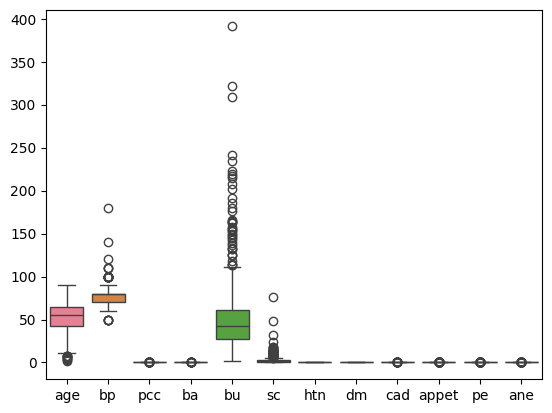

In [433]:
df_for_outliers = df.drop('class',axis=1)
sns.boxplot(data=df_for_outliers)

plt.show()

From this plot, we have found that most of predict variables contain outliers. In the original dataset, we should not make changes because these data are objective. However, before training the model, we can standardize these data

In [434]:
scaler = StandardScaler()

df[numerical] = scaler.fit_transform(df[numerical])

/var/folders/81/yhrrszz97gz7w6ntdbgvchq80000gn/T/ipykernel_34456/4006521348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical] = scaler.fit_transform(df[numerical])


## 7. Sub-group Analysis

In [435]:
df_x = df.drop('class',axis=1)
df_x

,age,bp,pcc,ba,bu,sc,htn,dm,cad,appet,pe,ane
0,-0.205036,0.251629,0.0,0.0,-0.420352,-0.319290,1.0,1.0,0.0,1.0,0.0,0.0
1,-2.622511,-1.973889,0.0,0.0,-0.784611,-0.390268,0.0,0.0,0.0,1.0,0.0,0.0
2,0.620443,0.251629,0.0,0.0,-0.076330,-0.212823,0.0,1.0,0.0,0.0,0.0,1.0
3,-0.205036,-0.490210,1.0,0.0,-0.015620,0.142068,1.0,0.0,0.0,0.0,1.0,1.0
4,-0.028148,0.251629,0.0,0.0,-0.622718,-0.283801,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207703,0.251629,0.0,0.0,-0.157276,-0.443502,0.0,0.0,0.0,1.0,0.0,0.0
396,-0.558813,-0.490210,0.0,0.0,-0.521535,-0.319290,0.0,0.0,0.0,1.0,0.0,0.0
397,-2.327697,0.251629,0.0,0.0,-0.622718,-0.425757,0.0,0.0,0.0,1.0,0.0,0.0
398,-2.032883,-1.232049,0.0,0.0,-0.137039,-0.354779,0.0,0.0,0.0,1.0,0.0,0.0


In [436]:
df_x.var()

age      1.002519
bp       1.002519
pcc      0.092636
ba       0.052352
bu       1.002519
sc       1.002519
htn      0.232175
dm       0.222219
cad      0.078326
appet    0.161007
pe       0.154880
ane      0.126584
dtype: float64

In [437]:
kmeans = KMeans(n_clusters=2, random_state=1)
kmeans.fit(df_x)

KMeans(n_clusters=2, random_state=1)

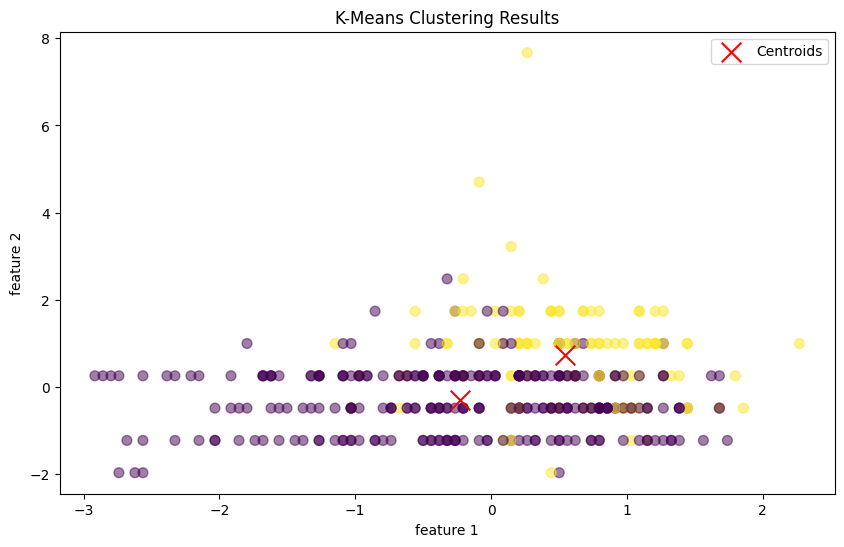

In [438]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(df_x.iloc[:, 0], df_x.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [439]:
pd.Series(kmeans.labels_).value_counts()

0    280
1    118
Name: count, dtype: int64

In [440]:
round(kmeans.inertia_,2)

1565.06

In [441]:
cluster_labels_km = kmeans.fit_predict(df_x)
silhouette_score(df_x, cluster_labels_km).round(2)

0.31

## 8. Data Splitting

In [442]:
df['class'] = df['class'].replace({'ckd': 1, 'notckd': 0})

/var/folders/81/yhrrszz97gz7w6ntdbgvchq80000gn/T/ipykernel_34456/2888872635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class'] = df['class'].replace({'ckd': 1, 'notckd': 0})


In [443]:
df.isna().any()

age      False
bp       False
pcc      False
ba       False
bu       False
sc       False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
class    False
dtype: bool

In [444]:
len(df)

398

In [445]:
X = df.drop(['class'], axis=1)

In [446]:
y = df['class']

In [447]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [448]:
X_train.head(5)

,age,bp,pcc,ba,bu,sc,htn,dm,cad,appet,pe,ane
289,-0.558813,-0.490210,0.0,0.0,-0.501298,-0.372524,0.0,0.0,0.0,1.0,0.0,0.0
202,1.563847,-1.232049,0.0,0.0,0.348639,-0.017633,0.0,1.0,0.0,1.0,0.0,1.0
104,0.207703,0.993468,0.0,0.0,0.631951,-0.177334,1.0,1.0,0.0,0.0,1.0,0.0
118,0.207703,-0.490210,0.0,0.0,-0.642954,-0.319290,0.0,0.0,0.0,0.0,1.0,0.0
267,-0.205036,0.251629,0.0,0.0,-0.481062,-0.372524,0.0,0.0,0.0,1.0,0.0,0.0


## 9. Classifier Choices

We note that there are a large number of numerical and categorical variables in this df, and to predict a binary in such a case, decision trees are a good choice because decision tree algorithms can handle mixed types of data. Also, decision trees have feature selection capability, which can improve the generalization ability and interpretability of the model. Therefore, decision tree is a very suitable algorithm.

Since the response variable is binary(ckd, notched), logistic regression is worth trying as well. It can easily handle categorical variables by using "OneHotEncoder", which allows it to handle a mix of numerical and categorical data. In our case, the data has many missing values even after cleaning there are still minor issues in data quality. The robustness of logistic regression can minimize the effectiveness of data quality issues.

## 10. Performance Matrixs

In [449]:
df_dt = DecisionTreeClassifier(
    max_depth = 30, 
    random_state=1
) 

In [450]:
df_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=1)

[Text(0.7297297297297297, 0.9642857142857143, 'sc <= -0.31\ngini = 0.47\nsamples = 278\nvalue = [105, 173]\nclass = ckd'),
 Text(0.5675675675675675, 0.8928571428571429, 'dm <= 0.5\ngini = 0.353\nsamples = 131\nvalue = [101, 30]\nclass = notckd'),
 Text(0.5135135135135135, 0.8214285714285714, 'pe <= 0.5\ngini = 0.267\nsamples = 120\nvalue = [101, 19]\nclass = notckd'),
 Text(0.4594594594594595, 0.75, 'age <= -2.328\ngini = 0.214\nsamples = 115\nvalue = [101, 14]\nclass = notckd'),
 Text(0.40540540540540543, 0.6785714285714286, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = ckd'),
 Text(0.5135135135135135, 0.6785714285714286, 'bp <= 0.993\ngini = 0.177\nsamples = 112\nvalue = [101, 11]\nclass = notckd'),
 Text(0.4594594594594595, 0.6071428571428571, 'age <= 1.652\ngini = 0.136\nsamples = 109\nvalue = [101, 8]\nclass = notckd'),
 Text(0.40540540540540543, 0.5357142857142857, 'ane <= 0.5\ngini = 0.121\nsamples = 108\nvalue = [101, 7]\nclass = notckd'),
 Text(0.35135135135135137, 0.46428

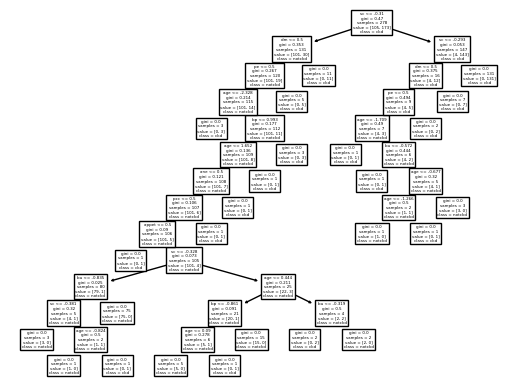

In [451]:
plot_tree(
    df_dt, 
    max_depth = 30, 
    feature_names = X_train.columns.tolist(), 
    class_names=['notckd', 'ckd']
)

In [452]:
pred = df_dt.predict(X_test)
pred[:5]

array([0, 1, 1, 1, 1])

In [453]:
cm = pd.DataFrame(confusion_matrix(y_test, pred), index=['notckd', 'ckd'], columns=['notckd', 'ckd'])
cm.index.name = 'True'
cm.columns.name = 'Predicted'
cm

Predicted,notckd,ckd
True,,
notckd,42,3
ckd,6,69


In [454]:
df_dt.score(X_test, y_test)

0.925

In [455]:
print(classification_report(y_test, pred))
print("Accuracy:", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.96      0.92      0.94        75

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120

Accuracy: 0.925


In [456]:
path = df_dt.cost_complexity_pruning_path(
    X_train, 
    y_train
)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [457]:
clfs = [] # save fitted trees with different alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=0, 
        ccp_alpha=ccp_alpha
        )
    clf.fit(X_train, y_train)
    clfs.append(clf)

test_score = [clf.score(X_test, y_test) for clf in clfs]

In [458]:
depth = [clf.tree_.max_depth for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

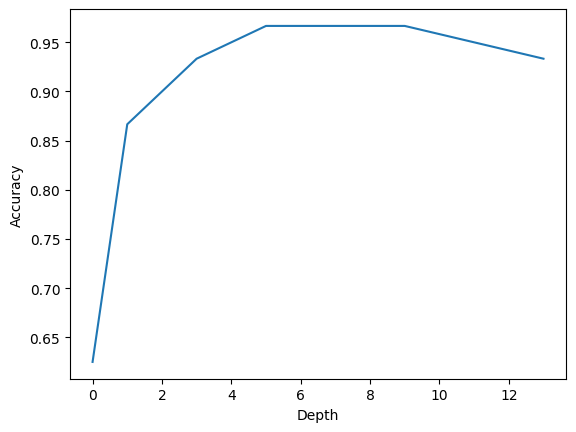

In [459]:
plt.plot(depth, test_score)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

Max accuracy at depth = 5

In [460]:
df_dt_best = DecisionTreeClassifier(
    max_depth = 5, 
    random_state=1
    ) 
df_dt_best.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=1)

## Logistic Regression

In [461]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



In [462]:
categorical_features = ['pcc','ba','htn','dm','cad','appet','pe','ane']
continuous_features=['age','bp','bu','sc']
transform= OneHotEncoder(drop='first') 
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', continuous_features),
        ('cat', transform, categorical_features)
    ])

In [463]:
X = df.drop('class', axis=1) 
y = df['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [464]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bp', 'bu', 'sc']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['pcc', 'ba', 'htn', 'dm',
                                                   'cad', 'appet', 'pe',
                                                   'ane'])])),
                ('classifier', LogisticRegression())])

In [465]:
predict = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predict))
print("Accuracy Score:", accuracy_score(y_test, predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.96      0.98        70

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

Accuracy Score: 0.975


In [466]:
matrix = confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[50  0]
 [ 3 67]]


The confusion matrix of the Decision tree model tells us there is a total of 120 observations. The model predicts 42 observations are notckd that is notckd, 6 of the observations model predict is notckd but it is ckd. Then the model predicted 69 observations of them are ckd that is are ckd, 3 of them model predicted is ckd but it is notckd

The confusion matrix of the logistic model tells us similar result. The model predicts 50 observations are notckd that is notckd, 3 of the observation model predict is notckd but it is ckd. Then the model correctly predicted all 67 of them are ckd, they are actually all ckd.

## 11. Feature Selection/Extraction

In [467]:
fea_imp = df_dt_best.feature_importances_

sorted_indices = fea_imp.argsort()[::-1]# read from the tail of the argsort to get greatest to least indices of the elements
sorted_feature_names = X_train.columns[sorted_indices]
sorted_importances = fea_imp[sorted_indices]

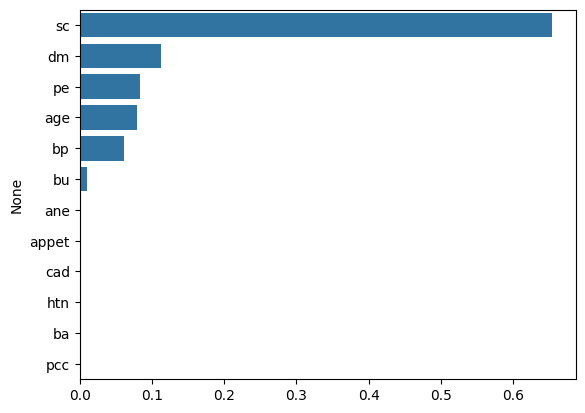

In [468]:
sns.barplot(x = sorted_importances, y = sorted_feature_names)
plt.show()

Among all the variables, sc is the most influential variable in decision tree operations, followed by dm, pe, age, bp and bu, and the other variables are relatively less influential

## 12. Classifier Comparison

Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        50
           1       0.96      0.97      0.96        70

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



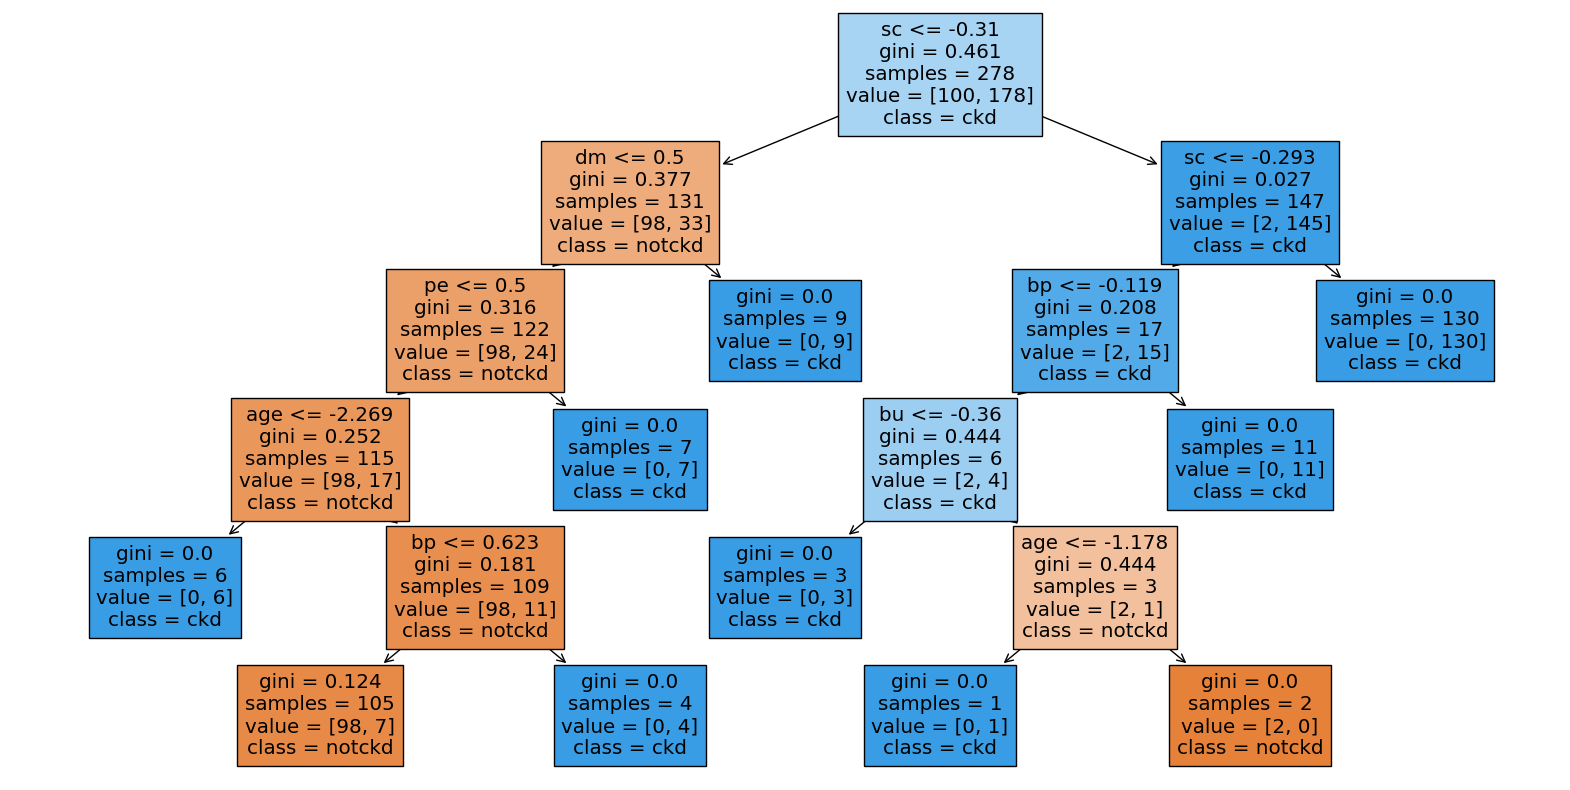

In [469]:
clf = DecisionTreeClassifier(max_depth = 5, 
    random_state=1) 

clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,feature_names = X_train.columns.tolist(),class_names=['notckd', 'ckd'])
plt.show()

Now the accuracy is 93.33333333333333%, which is higher than the one when depth = 30 (0.925)

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.99      0.97      0.98        70

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



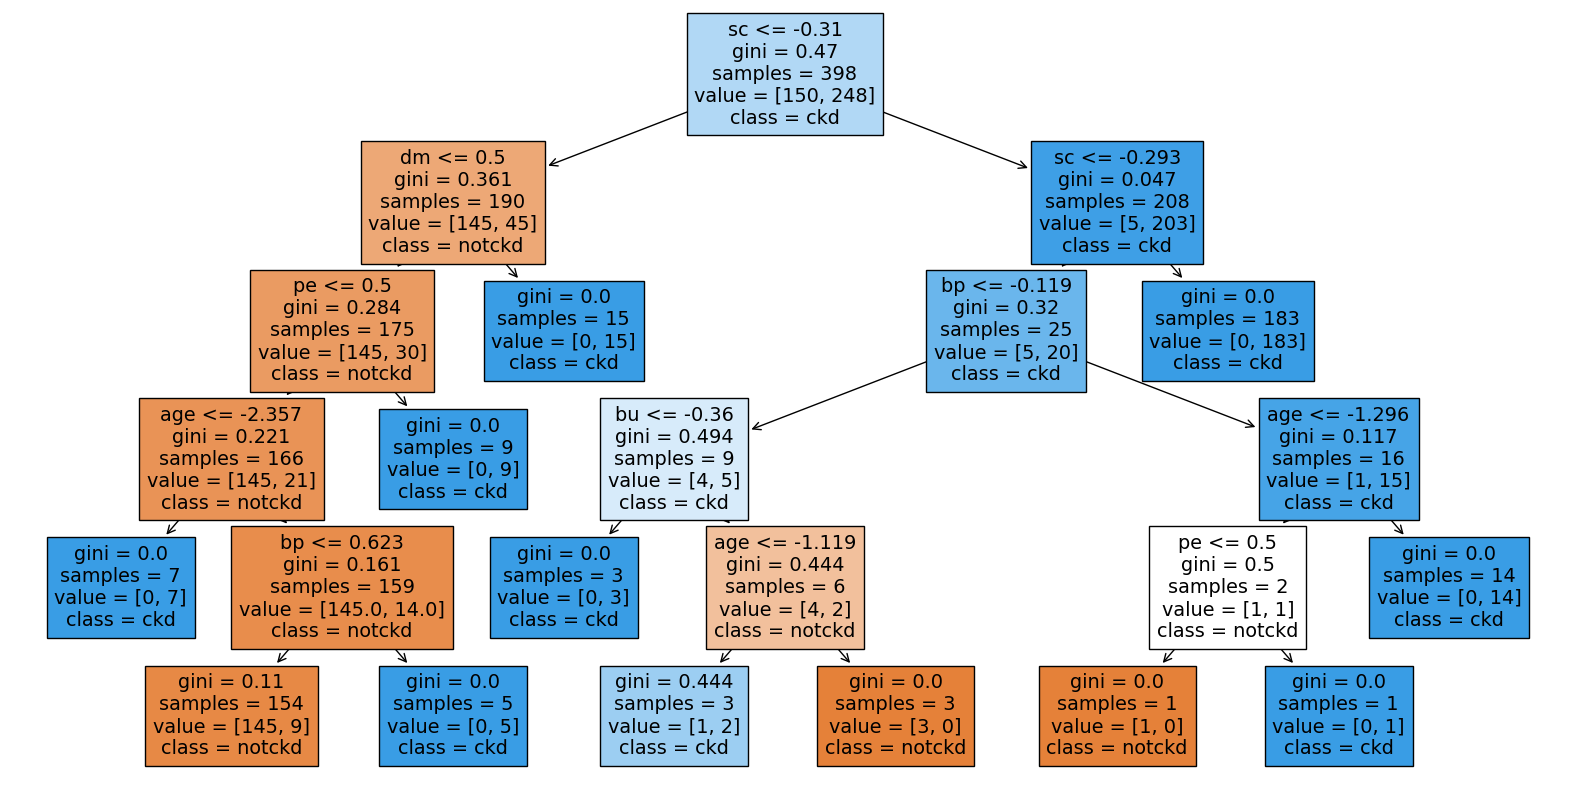

In [470]:
clf = DecisionTreeClassifier(max_depth = 5, 
    random_state=1) 

clf.fit(X, y)


y_pred = clf.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


plt.figure(figsize=(20,10))
plot_tree(clf, filled=True,feature_names = X_train.columns.tolist(),class_names=['notckd', 'ckd'])
plt.show()

## Logistic Regression

In [471]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [472]:
categorical_features = ['pcc','ba','htn','dm','cad','appet','pe','ane']
continuous_features=['age','bp','bu','sc']
transform= OneHotEncoder(drop='first') 
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', continuous_features),
        ('cat', transform, categorical_features)
    ])

In [473]:
X = df.drop('class', axis=1) 
y = df['class'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [474]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'bp', 'bu', 'sc']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['pcc', 'ba', 'htn', 'dm',
                                                   'cad', 'appet', 'pe',
                                                   'ane'])])),
                ('classifier', LogisticRegression())])

In [475]:
predict = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, predict))
print("Accuracy Score:", accuracy_score(y_test, predict))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        50
           1       1.00      0.96      0.98        70

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120

Accuracy Score: 0.975


In [476]:
matrix = confusion_matrix(y_test, predict)
print("Confusion Matrix:\n", matrix)

Confusion Matrix:
 [[50  0]
 [ 3 67]]


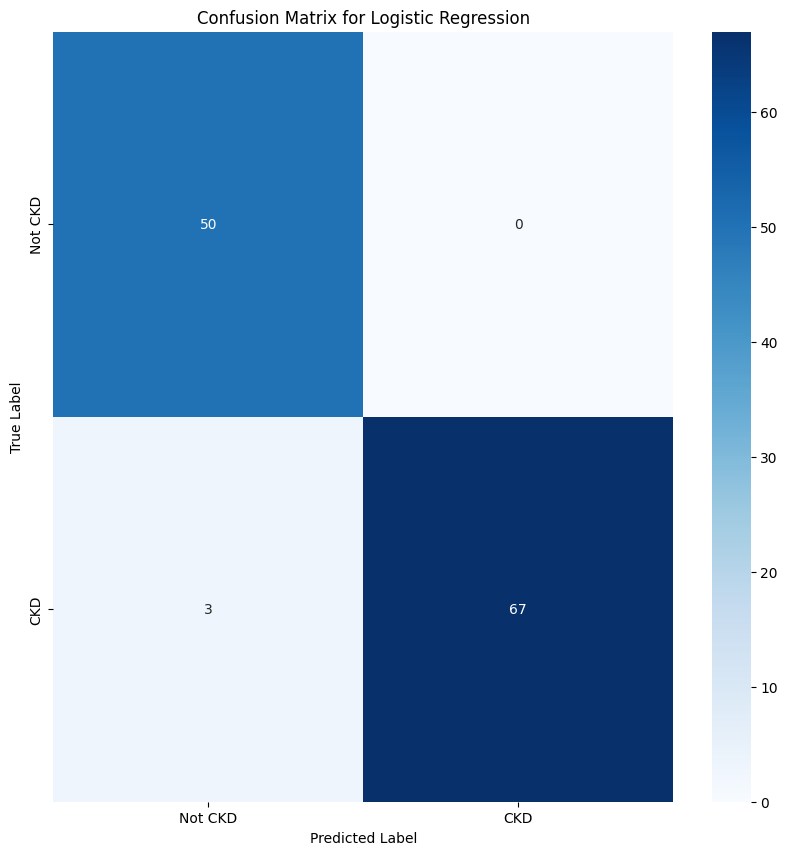

In [477]:
plt.figure(figsize=(10,10))
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Finding:
1. The Decision tree model has 93.3 percent accuarcy, The Logistic regression has model has 97.5 percent accuarcy. 
2. Thought the test set not even Logistic regression model has higher accuarcy than the Decision Tree model, but also for the F-score and the prescisions for individual 1 and 0, Logistic regression also has higher accuarcy than using decision tree. 

## 13 Interpretable Classifier Insight: 

In [478]:
## logistic Regression
X1 = df.drop('class', axis=1) 
y1 = df['class']

In [479]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X1, y1)
Thepredict = pipeline.predict(X1)
print("Classification Report:\n", classification_report(y1, Thepredict))
print("Accuracy Score:", accuracy_score(y1, Thepredict))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       150
           1       1.00      0.90      0.95       248

    accuracy                           0.94       398
   macro avg       0.93      0.95      0.94       398
weighted avg       0.95      0.94      0.94       398

Accuracy Score: 0.9396984924623115


In [480]:
import statsmodels.api as sm

In [481]:
X_added = sm.add_constant(X1)  # Adding a constant
logit_model = sm.Logit(y1, X_added)
result = logit_model.fit()

         Current function value: 0.137624
         Iterations: 35


/Users/itsmine/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [482]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  398
Model:                          Logit   Df Residuals:                      385
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Apr 2024   Pseudo R-squ.:                  0.7923
Time:                        21:37:54   Log-Likelihood:                -54.775
converged:                      False   LL-Null:                       -263.68
Covariance Type:            nonrobust   LLR p-value:                 6.362e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.4329   1.13e+04      0.002      0.998   -2.22e+04    2.22e+04
age           -0.5846      0.277     -2.107      0.035      -1.128      -0.041
bp             0.6678      0.330      2.025      0.0

1. For the logistic regression model, the accuracy of the model dropped approximately 4 percent, after we applied for all the available data. 
2. Then though the model's P-value we can conclude at a 5% significant level, only age, bp, and sc are statistically significant. With this many insignificant variables in the model can cause bad performance on the unseen data. 

## Chronic Kidney Disease Classification Challenge

### Overview

Engage with the dataset from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease) project, which comprises data on 250 early-stage CKD patients and 150 healthy controls.

For foundational knowledge on the subject, refer to "Predict, diagnose, and treat chronic kidney disease with machine learning: a systematic literature review" by [Sanmarchi et al., (2023)](https://link.springer.com/article/10.1007/s40620-023-01573-4).

### Objectives

Analyze the dataset using two classification algorithms, focusing on exploratory data analysis, feature selection, engineering, and especially on handling missing values and outliers. Summarize your findings with insightful conclusions.

**Classifier Requirement:** Ensure at least one of the classifiers is interpretable, to facilitate in-depth analysis and inference.

### Guidelines

- **Teamwork:** Group submissions should compile the workflow (Python codes and interpretations) into a single PDF, including a GitHub repository link. The contributions listed should reflect the GitHub activity.
- **Content:** Address the following questions in your submission, offering detailed insights and conclusions from your analysis.

### Assignment Questions

1. **Classification Problem Identification:** Define and describe a classification problem based on the dataset.
2. **Variable Transformation:** Implement any transformations chosen or justify the absence of such modifications.
3. **Dataset Overview:** Provide a detailed description of the dataset, covering variables, summaries, observation counts, data types, and distributions (at least three statements).
4. **Association Between Variables:** Analyze variable relationships and their implications for feature selection or extraction (at least three statements).
5. **Missing Value Analysis and Handling:** Implement your strategy for identifying and addressing missing values in the dataset, or provide reasons for not addressing them.
6. **Outlier Analysis:** Implement your approach for identifying and managing outliers, or provide reasons for not addressing them.
7. **Sub-group Analysis:** Explore potential sub-groups within the data, employing appropriate data science methods to find the sub-groups of patients and visualize the sub-groups. The sub-group analysis must not include the labels (for CKD patients and healthy controls).
8. **Data Splitting:** Segregate 30% of the data for testing, using a random seed of 1. Use the remaining 70% for training and model selection.
9. **Classifier Choices:** Identify the two classifiers you have chosen and justify your selections.
10. **Performance Metrics:** Outline the two metrics for comparing the performance of the classifiers.
11. **Feature Selection/Extraction:** Implement methods to enhance the performance of at least one classifier in (9). The answer for this question can be included in (12).
12. **Classifier Comparison:** Utilize the selected metrics to compare the classifiers based on the test set. Discuss your findings (at least two statements).
13. **Interpretable Classifier Insight:** After re-training the interpretable classifier with all available data, analyze and interpret the significance of predictor variables in the context of the data and the challenge (at least two statements).
14. **[Bonus]** Sub-group Improvement Strategy: If sub-groups were identified, propose and implement a method to improve one classifier performance further. Compare the performance of the new classifer with the results in (12).
15. **Team Contributions:** Document each team member's specific contributions related to the questions above.
16. **Link** to the public GitHub repository.

### Notes

- This assignment encourages you to apply sophisticated machine learning methods to a vital healthcare challenge, promoting the development of critical analytical skills, teamwork, and practical problem-solving abilities in the context of chronic kidney disease diagnosis and treatment.
- Students can choose one classifer not covered in the lectures.

\newpage

## Grading scheme 

\begin{table}[H]
\begin{tabular}{p{0.15\textwidth}  p{0.65\textwidth}}
1.   & Answer [1]\\
2.   & Codes [2] \\
     & OR answer [2]\\
3.   & Codes [3] and answer [3]\\
4.   & Codes [2] and answer [3]\\
5.   & Codes [2]\\
     & OR answer [2]\\
6.   & Codes [2] \\
     & OR answer [2]\\
7.   & Codes [3] and Plot [1]\\
8.   & Codes [1]\\
9.   & Answers [2]\\
10.   & Describe the two metrics [2]\\
11.   & Codes [2] \\
      & these codes can be included in (12)\\
12.   & Codes (two classifiers training,\\
     & model selection for each classifier, \\
     & classifiers comparisons) [5] and answer [2]\\
13.   & Codes [1] and answers [2]\\
14.   & Codes and comparison will \\
     & give \textbf{bonus 2 points for the final grade}.\\
\end{tabular}
\end{table}

**The maximum point for this assignment is 39. We will convert this to 100%.**

**All group members will receive the same grade if they contribute to the same.**


https://github.com/huanj164/Assignment_6.git